In [38]:
# import relevant libraries
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from matplotlib.patches import Patch

# set path to Figures
figures = os.path.join(os.getcwd(), 'Figures')
if not os.path.exists(figures):
    os.makedirs(figures)

# set style for seaborn and size of figures
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [9, 6]

<>:39: SyntaxWarning: invalid escape sequence '\e'
<>:43: SyntaxWarning: invalid escape sequence '\e'
<>:49: SyntaxWarning: invalid escape sequence '\e'
<>:53: SyntaxWarning: invalid escape sequence '\e'
<>:39: SyntaxWarning: invalid escape sequence '\e'
<>:43: SyntaxWarning: invalid escape sequence '\e'
<>:49: SyntaxWarning: invalid escape sequence '\e'
<>:53: SyntaxWarning: invalid escape sequence '\e'
C:\Users\User\AppData\Local\Temp\ipykernel_29892\1858970155.py:39: SyntaxWarning: invalid escape sequence '\e'
  axes[0].set_xlabel('Outcome (o = e + $\epsilon$)', fontsize=14)
C:\Users\User\AppData\Local\Temp\ipykernel_29892\1858970155.py:43: SyntaxWarning: invalid escape sequence '\e'
  axes[0].legend(['$\epsilon$ ~ Normal(0,1)'], loc='upper left', fontsize=12)
C:\Users\User\AppData\Local\Temp\ipykernel_29892\1858970155.py:49: SyntaxWarning: invalid escape sequence '\e'
  axes[1].set_xlabel('Outcome (o = e + $\epsilon$)', fontsize=14)
C:\Users\User\AppData\Local\Temp\ipykernel_29892\

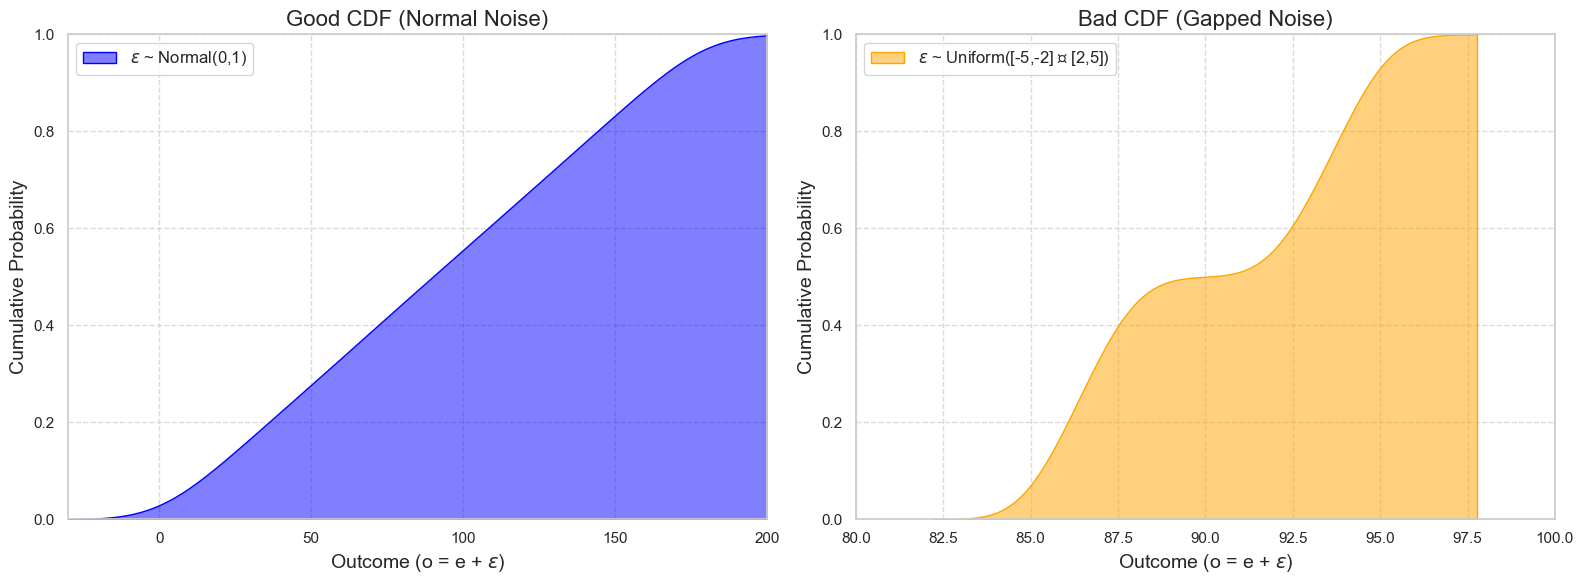

In [39]:
# Set random seed for reproducibility
np.random.seed(1234)

# ----- Panel 1: Good CDF (Normal noise) -----

n = 1000

# Effort grows linearly
e_good = np.linspace(0, 180, n)

# Epsilon is normal noise
epsilon_good = np.random.normal(0, 1, n)

# Outcome
o_good = e_good + epsilon_good

# ----- Panel 2: Bad CDF (Gapped noise) -----

# Constant effort
e_bad = np.full(n, 90)

# Gapped epsilon: Uniform on [-5, -2] U [2, 5]
epsilon_bad = np.concatenate([
    np.random.uniform(-5, -2, n//2),
    np.random.uniform(2, 5, n//2)
])
np.random.shuffle(epsilon_bad)

# Outcome
o_bad = e_bad + epsilon_bad

# ----- Plot both -----

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Panel 1: Good CDF
sns.kdeplot(o_good, cumulative=True, ax=axes[0], fill=True, color='blue', alpha=0.5)
axes[0].set_title('Good CDF (Normal Noise)', fontsize=16)
axes[0].set_xlabel('Outcome (o = e + $\epsilon$)', fontsize=14)
axes[0].set_ylabel('Cumulative Probability', fontsize=14)
axes[0].set_xlim(-30, 200)
axes[0].set_ylim(0, 1)
axes[0].legend(['$\epsilon$ ~ Normal(0,1)'], loc='upper left', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Panel 2: Bad CDF
sns.kdeplot(o_bad, cumulative=True, ax=axes[1], fill=True, color='orange', alpha=0.5)
axes[1].set_title('Bad CDF (Gapped Noise)', fontsize=16)
axes[1].set_xlabel('Outcome (o = e + $\epsilon$)', fontsize=14)
axes[1].set_ylabel('Cumulative Probability', fontsize=14)
axes[1].set_xlim(80, 100)  # zoom around effort + noise
axes[1].set_ylim(0, 1)
axes[1].legend(['$\epsilon$ ~ Uniform([-5,-2] ∪ [2,5])'], loc='upper left', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(os.path.join(figures, 'CDF_Comparison.png'), dpi=300)
plt.show()

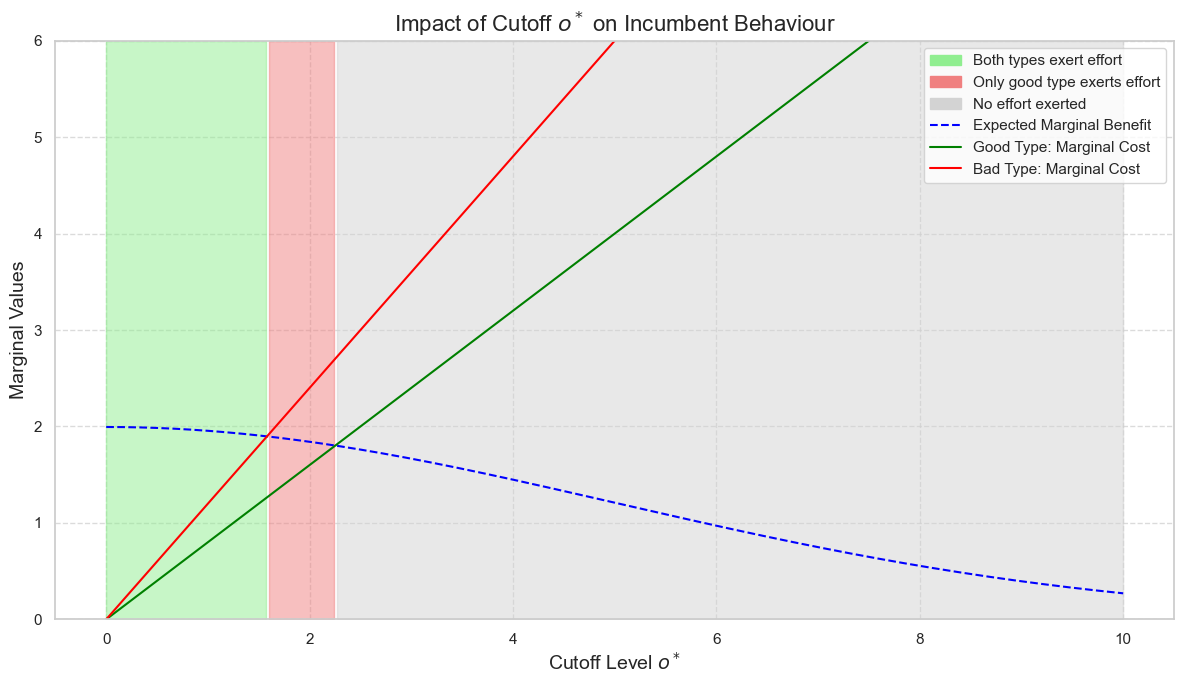

In [42]:
# Set parameters
n = 300
o_star = np.linspace(0, 10, n)

# Effort function
lambda_e = 0.8
e = lambda_e * o_star

# Marginal costs
marginal_cost_good = e
marginal_cost_bad = 1.5 * e

# Expected marginal benefit
R = 5
marginal_benefit = R * norm.pdf(o_star - e)

# Create figure
fig, ax = plt.subplots(figsize=(12, 7))

# Plot marginal benefit and costs
ax.plot(o_star, marginal_benefit, label='Expected Marginal Benefit', color='blue', linestyle='--')
ax.plot(o_star, marginal_cost_good, label='Good Type: Marginal Cost', color='green')
ax.plot(o_star, marginal_cost_bad, label='Bad Type: Marginal Cost', color='red')

# Fill regions
region_both = (marginal_benefit >= marginal_cost_bad)
region_good_only = (marginal_benefit >= marginal_cost_good) & (marginal_benefit < marginal_cost_bad)
region_none = (marginal_benefit < marginal_cost_good)

ax.fill_between(o_star, 0, 6, where=region_both, color='lightgreen', alpha=0.5)
ax.fill_between(o_star, 0, 6, where=region_good_only, color='lightcoral', alpha=0.5)
ax.fill_between(o_star, 0, 6, where=region_none, color='lightgray', alpha=0.5)

# Labels
ax.set_xlabel('Cutoff Level $o^*$', fontsize=14)
ax.set_ylabel('Marginal Values', fontsize=14)
ax.set_title('Impact of Cutoff $o^*$ on Incumbent Behaviour', fontsize=16)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylim(0, 6)

# Custom legend with soft (no edge) color patches
legend_elements = [
    Patch(facecolor='lightgreen', edgecolor='lightgreen', label='Both types exert effort'),  # no black edge
    Patch(facecolor='lightcoral', edgecolor='lightcoral', label='Only good type exerts effort'),  # no black edge
    Patch(facecolor='lightgray', edgecolor='lightgray', label='No effort exerted'),  # no black edge
    plt.Line2D([0], [0], color='blue', linestyle='--', label='Expected Marginal Benefit'),
    plt.Line2D([0], [0], color='green', label='Good Type: Marginal Cost'),
    plt.Line2D([0], [0], color='red', label='Bad Type: Marginal Cost')
]

# Frame around whole legend is ON by default
ax.legend(handles=legend_elements, loc='upper right', fontsize=11, frameon=True)

# Save and show the plot
plt.tight_layout()
plt.savefig(os.path.join(figures, 'Tradeoff_Cutoff.png'), dpi=300)
plt.show()
